In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Marchenko-Pastur distribution

In [2]:
def mpPDF(var, q, pts=1000, val_range=None):
    """
    Creates a Marchenko-Pastur Probability Density Function
    Args:
        var (float): Variance
        q (float): T/N where T is the number of rows and N the number of columns
        pts (int): Number of points used to construct the PDF
    Returns:
        pd.Series: Marchenko-Pastur PDF
    """
    # Marchenko-Pastur pdf
    # Adjusting code to work with 1 dimension arrays
    if isinstance(var, np.ndarray):
        if var.shape == (1,):
            var = var[0]
            
    eMin, eMax = var*(1 - (1./q)**.5)**2, var*(1 + (1./q)**.5)** 2
    if val_range is None: val_range = (eMin, eMax)
        
    val_range = np.linspace(val_range[0], val_range[1], pts)
    def pdf(x):
        if x >= eMin and x <= eMax:
            return q/(2*np.pi*var*x)*((eMax - x)*(x - eMin))**.5
        else:
            return 0
        
    out = pd.Series([pdf(x) for x in val_range], index=val_range)
    
    return out

In [3]:
# make theoretical distributions
pdf_100_th = mpPDF(1., q=2000/100, pts=1000, val_range=(0,3))
pdf_200_th = mpPDF(1., q=2000/200, pts=1000, val_range=(0,3))
pdf_500_th = mpPDF(1., q=2000/500, pts=1000, val_range=(0,3))
pdf_1000_th = mpPDF(1., q=2000/1000, pts=1000, val_range=(0,3))

# White Noise

In [ ]:
# load empirical distributions
distr_path = "white_noise/distributions" #set folder where eigenvalue distributions are found
pdf_100_emp = pd.read_csv(os.path.join(distr_path,"pdf_100.csv"), index_col=0)
pdf_200_emp = pd.read_csv(os.path.join(distr_path,"pdf_200.csv"), index_col=0)
pdf_500_emp = pd.read_csv(os.path.join(distr_path,"pdf_500.csv"), index_col=0)
pdf_1000_emp = pd.read_csv(os.path.join(distr_path,"pdf_1000.csv"), index_col=0)

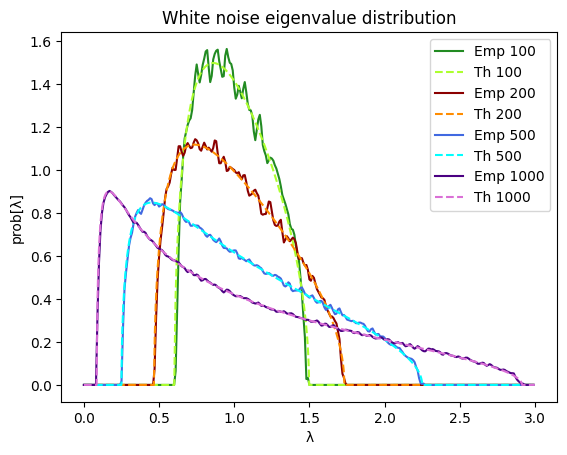

In [8]:
# Plotting results
plt.plot(pdf_100_emp.index, pdf_100_emp.values, label="Emp 100", color="forestgreen")
plt.plot(pdf_100_th.index, pdf_100_th.values, label="Th 100", color="greenyellow", ls='--')
plt.plot(pdf_200_emp.index, pdf_200_emp.values, label="Emp 200", color="darkred")
plt.plot(pdf_200_th.index, pdf_200_th.values, label="Th 200", color="darkorange", ls='--')
plt.plot(pdf_500_emp.index, pdf_500_emp.values, label="Emp 500", color="royalblue")
plt.plot(pdf_500_th.index, pdf_500_th.values, label="Th 500", color="aqua", ls='--')
plt.plot(pdf_1000_emp.index, pdf_1000_emp.values, label="Emp 1000", color="indigo")
plt.plot(pdf_1000_th.index, pdf_1000_th.values, label="Th 1000", color="orchid", ls='--')

plt.xlabel("λ")
plt.ylabel("prob[λ]")
plt.legend(loc="upper right")
plt.title("White noise eigenvalue distribution")
plt.show()

# Kuramoto

In [24]:
# load empirical distributions
distr_path = "kuramoto/distributions" #set folder where eigenvalue distributions are found
pdf_10_1000_emp = pd.read_csv(os.path.join(distr_path,"pdf_10_1000.csv"), index_col=0)
pdf_15_1000_emp = pd.read_csv(os.path.join(distr_path,"pdf_15_1000.csv"), index_col=0)
pdf_25_1000_emp = pd.read_csv(os.path.join(distr_path,"pdf_25_1000.csv"), index_col=0)
pdf_50_1000_emp = pd.read_csv(os.path.join(distr_path,"pdf_50_1000.csv"), index_col=0)
pdf_10_500_emp = pd.read_csv(os.path.join(distr_path,"pdf_10_500.csv"), index_col=0)
pdf_15_500_emp = pd.read_csv(os.path.join(distr_path,"pdf_15_500.csv"), index_col=0)
pdf_25_500_emp = pd.read_csv(os.path.join(distr_path,"pdf_25_500.csv"), index_col=0)
pdf_50_500_emp = pd.read_csv(os.path.join(distr_path,"pdf_50_500.csv"), index_col=0)
pdf_10_100_emp = pd.read_csv(os.path.join(distr_path,"pdf_10_1000.csv"), index_col=0)
pdf_15_100_emp = pd.read_csv(os.path.join(distr_path,"pdf_15_1000.csv"), index_col=0)
pdf_25_100_emp = pd.read_csv(os.path.join(distr_path,"pdf_25_1000.csv"), index_col=0)
pdf_50_100_emp = pd.read_csv(os.path.join(distr_path,"pdf_50_1000.csv"), index_col=0)
pdf_10_200_emp = pd.read_csv(os.path.join(distr_path,"pdf_10_500.csv"), index_col=0)
pdf_15_200_emp = pd.read_csv(os.path.join(distr_path,"pdf_15_500.csv"), index_col=0)
pdf_25_200_emp = pd.read_csv(os.path.join(distr_path,"pdf_25_500.csv"), index_col=0)
pdf_50_200_emp = pd.read_csv(os.path.join(distr_path,"pdf_50_500.csv"), index_col=0)

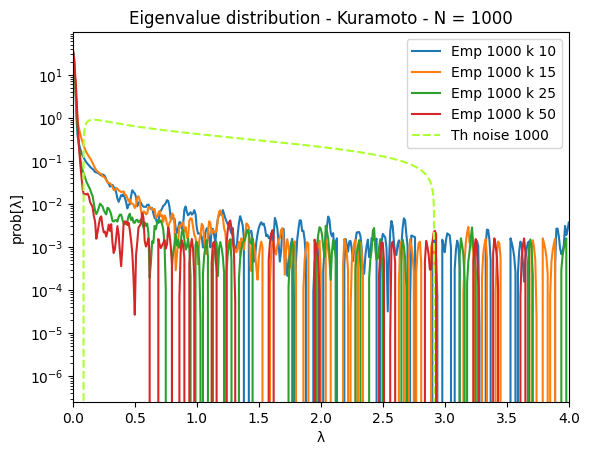

In [32]:
# Plotting results
plt.plot(pdf_10_1000_emp.index, pdf_10_1000_emp.values, label="Emp 1000 k 10")
plt.plot(pdf_15_1000_emp.index, pdf_15_1000_emp.values, label="Emp 1000 k 15")
plt.plot(pdf_25_1000_emp.index, pdf_25_1000_emp.values, label="Emp 1000 k 25")
plt.plot(pdf_50_1000_emp.index, pdf_50_1000_emp.values, label="Emp 1000 k 50")
plt.plot(pdf_1000_th.index, pdf_1000_th.values, label="Th noise 1000", color="greenyellow", ls='--')

plt.xlabel("λ")
plt.ylabel("prob[λ]")
plt.legend(loc="upper right")
plt.title("Eigenvalue distribution - Kuramoto - N = 1000")
plt.xlim(0,4)
#plt.ylim(-1,2)
plt.yscale('log')
plt.show()

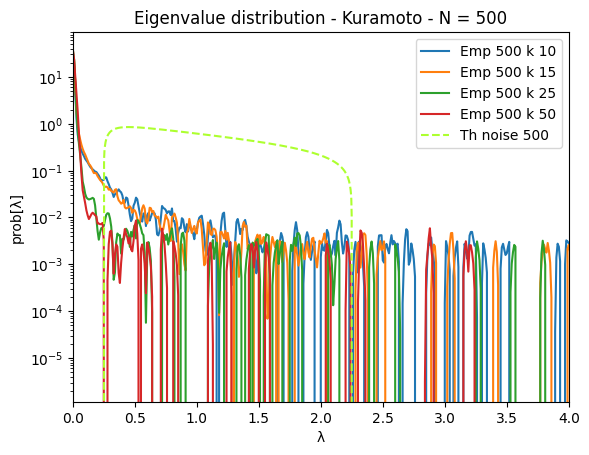

In [33]:
# Plotting results
plt.plot(pdf_10_500_emp.index, pdf_10_500_emp.values, label="Emp 500 k 10")
plt.plot(pdf_15_500_emp.index, pdf_15_500_emp.values, label="Emp 500 k 15")
plt.plot(pdf_25_500_emp.index, pdf_25_500_emp.values, label="Emp 500 k 25")
plt.plot(pdf_50_500_emp.index, pdf_50_500_emp.values, label="Emp 500 k 50")
plt.plot(pdf_500_th.index, pdf_500_th.values, label="Th noise 500", color="greenyellow", ls='--')

plt.xlabel("λ")
plt.ylabel("prob[λ]")
plt.legend(loc="upper right")
plt.title("Eigenvalue distribution - Kuramoto - N = 500")
plt.xlim(0,4)
#plt.xlim(480,520)
#plt.ylim(-1,2)
plt.yscale('log')
plt.show()

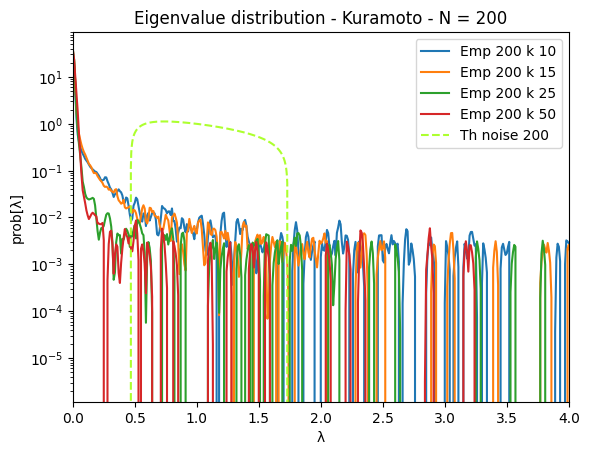

In [34]:
# Plotting results
plt.plot(pdf_10_200_emp.index, pdf_10_200_emp.values, label="Emp 200 k 10")
plt.plot(pdf_15_200_emp.index, pdf_15_200_emp.values, label="Emp 200 k 15")
plt.plot(pdf_25_200_emp.index, pdf_25_200_emp.values, label="Emp 200 k 25")
plt.plot(pdf_50_200_emp.index, pdf_50_200_emp.values, label="Emp 200 k 50")
plt.plot(pdf_200_th.index, pdf_200_th.values, label="Th noise 200", color="greenyellow", ls='--')

plt.xlabel("λ")
plt.ylabel("prob[λ]")
plt.legend(loc="upper right")
plt.title("Eigenvalue distribution - Kuramoto - N = 200")
plt.xlim(0,4)
#plt.ylim(-1,2)
plt.yscale('log')
plt.show()

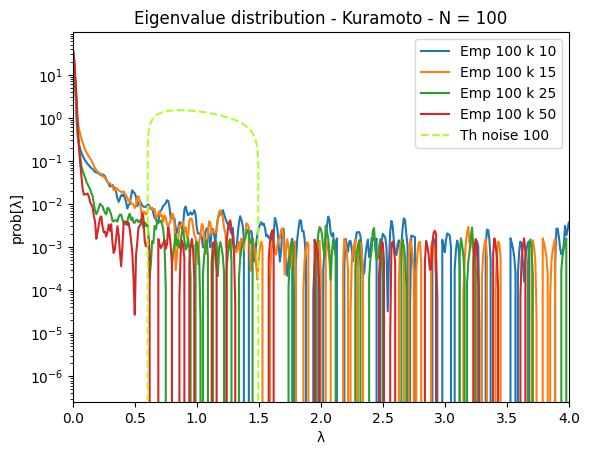

In [35]:
# Plotting results
plt.plot(pdf_10_100_emp.index, pdf_10_100_emp.values, label="Emp 100 k 10")
plt.plot(pdf_15_100_emp.index, pdf_15_100_emp.values, label="Emp 100 k 15")
plt.plot(pdf_25_100_emp.index, pdf_25_100_emp.values, label="Emp 100 k 25")
plt.plot(pdf_50_100_emp.index, pdf_50_100_emp.values, label="Emp 100 k 50")
plt.plot(pdf_100_th.index, pdf_100_th.values, label="Th noise 100", color="greenyellow", ls='--')

plt.xlabel("λ")
plt.ylabel("prob[λ]")
plt.legend(loc="upper right")
plt.title("Eigenvalue distribution - Kuramoto - N = 100")
plt.xlim(0,4)
#plt.ylim(-1,2)
plt.yscale('log')
plt.show()

In [19]:
ts = np.loadtxt("kuramoto/time_series/kuramoto_k10_1000_1.csv", delimiter = ',')
r_10 = np.abs(np.sum(np.exp(1.j * ts), axis = 1))
ts = np.loadtxt("kuramoto/time_series/kuramoto_k15_1000_1.csv", delimiter = ',')
r_15 = np.abs(np.sum(np.exp(1.j * ts), axis = 1))
ts = np.loadtxt("kuramoto/time_series/kuramoto_k25_1000_1.csv", delimiter = ',')
r_25 = np.abs(np.sum(np.exp(1.j * ts), axis = 1))
ts = np.loadtxt("kuramoto/time_series/kuramoto_k50_1000_1.csv", delimiter = ',')
r_50 = np.abs(np.sum(np.exp(1.j * ts), axis = 1))

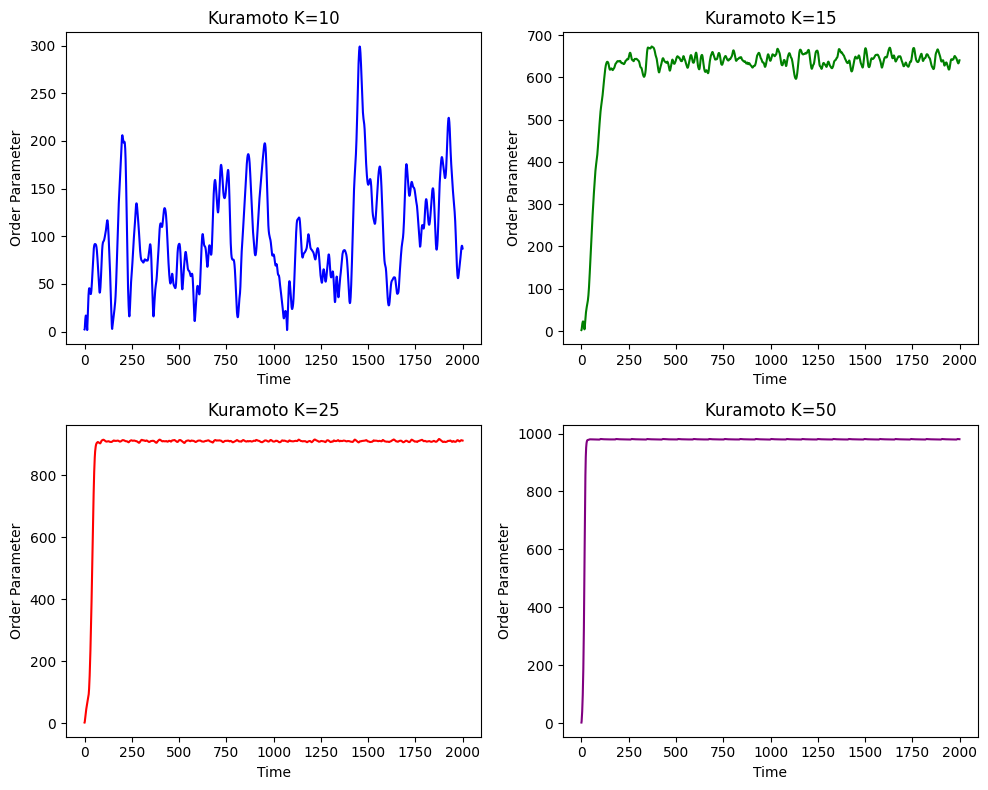

In [31]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot r_10 in the first subplot
axs[0, 0].plot(r_10, label='r_10', color='blue')
axs[0, 0].set_title('Kuramoto K=10')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Order Parameter')

# Plot r_15 in the second subplot
axs[0, 1].plot(r_15, label='r_15', color='green')
axs[0, 1].set_title('Kuramoto K=15')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Order Parameter')

# Plot r_25 in the third subplot
axs[1, 0].plot(r_25, label='r_25', color='red')
axs[1, 0].set_title('Kuramoto K=25')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Order Parameter')

# Plot r_50 in the fourth subplot
axs[1, 1].plot(r_50, label='r_50', color='purple')
axs[1, 1].set_title('Kuramoto K=50')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Order Parameter')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

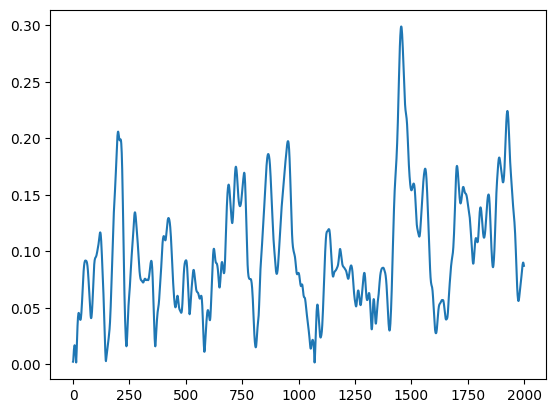

In [18]:
plt.plot(r/1000)